# Communicate Data Findings on Loan Data 
## Source : Prosper
## by Jason Sujaya

## Preliminary Wrangling

> The Dataset contains 113,917 loans with different feature associated with a loan such as it's APR, loan amount, etc. In this investigation, we are interested to understand factors that influence the APR of a loan.


In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [32]:
#Load Dataset
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [33]:
# View the size of the dataset
df.shape

(113937, 81)

In [34]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [35]:
# Selecting Columns We Are Interested in
interest_column = ['LoanStatus','Occupation','LoanOriginalAmount','ListingCategory (numeric)', 'BorrowerAPR', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Term','ProsperRating (Alpha)','EmploymentStatus', "ProsperScore", "CreditGrade"]
loan = df[interest_column]

In [36]:
# Convert into categorical data
rate = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

# Removing missing information
loan = loan[~loan.BorrowerAPR.isna()]
loan = loan[~loan.ProsperScore.isna()]
loan["CreditGrade"].fillna("None", inplace=True)
loan["EmploymentStatus"].fillna("Null", inplace=True)
loan["Occupation"].fillna("None", inplace=True)


#Checks for null value
loan.isnull().sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


LoanStatus                   0
Occupation                   0
LoanOriginalAmount           0
ListingCategory (numeric)    0
BorrowerAPR                  0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
Term                         0
ProsperRating (Alpha)        0
EmploymentStatus             0
ProsperScore                 0
CreditGrade                  0
dtype: int64

### What is the structure of your dataset?

The dataset is consisted of 113937 loans with 81 columns


### What is/are the main feature(s) of interest in your dataset?

We will determine the best predictor of an APR (annual cost of a loan to a borrower)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I've selected the following feature for the project:

> 'LoanStatus','Occupation','LoanOriginalAmount', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Term','ProsperRating (Alpha)','EmploymentStatus', "ProsperScore", "CreditGrade"

## Univariate Exploration

In [37]:
# Wrangling
# Reducing skewness in monthly income by removing top 0.1%
loan = loan[loan["StatedMonthlyIncome"]<np.percentile(loan.StatedMonthlyIncome,99.9)]

#Create color scheme
color1 = sb.color_palette()[0]

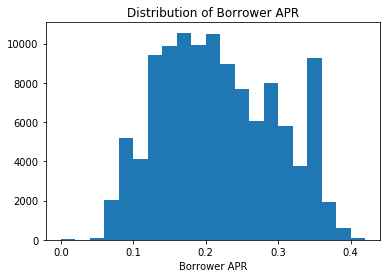

In [38]:
#Plot Borrower APR
bins = np.arange(0, loan["BorrowerAPR"].max(), 0.02)
sb.distplot(df['BorrowerAPR'], bins = bins, kde = False, hist_kws = {'alpha' : 1}, color=color1)
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

First, we plot the distribution of the APR to gain an overview of the situation. The APR Distribution seems to be multimodal and ranges from 0.5% to 4.2%. In the peak of the multimodal, there should be some variable which influences a lot of loans to fall near those peaks.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


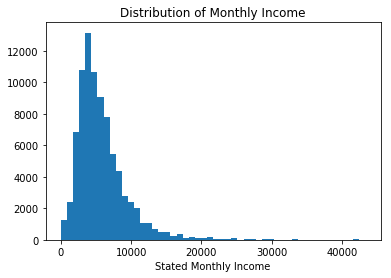

In [39]:
#Plot Monthly Income
sb.distplot(loan["StatedMonthlyIncome"],kde = False, hist_kws = {'alpha' : 1}, color=color1);
plt.xlabel('Stated Monthly Income');
plt.title('Distribution of Monthly Income');

One particular hyptohesis is the monthly income. The StatedMonthlyIncome don't have a similar distribution to the APR. Instead it has normal distribution that is highly right skewed. 

Without any operation on the data, there's a few outliers with really huge monthly income which could be true but could likely be an error in the data entry as it don't reflect the amount of loan that person borrows (ussually less than 10k). The majority of the income now lies below 30k. 


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


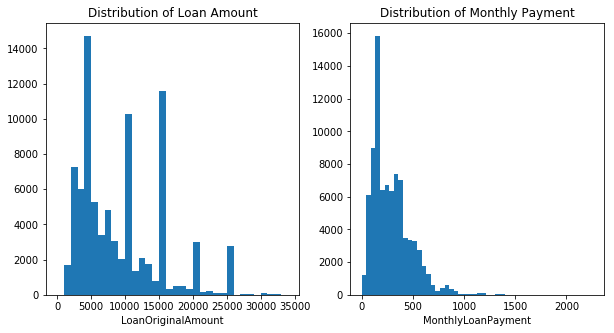

In [40]:
plt.figure(figsize = [10, 5])

#Loan Original Amount
plt.subplot(1, 2, 1)
bins = np.arange(0, loan["LoanOriginalAmount"].max(), 1000)
sb.distplot(loan["LoanOriginalAmount"],kde = False, hist_kws = {'alpha' : 1}, bins=bins, color=color1);
plt.title('Distribution of Loan Amount');

#Loan Original Amount
plt.subplot(1, 2, 2)
sb.distplot(loan["MonthlyLoanPayment"],kde = False, hist_kws = {'alpha' : 1}, color=color1);
plt.title('Distribution of Monthly Payment');

We further plot the loan amount and monthly payment. The loan payment have some similar characteristic with the APR distribution but what's interesting is the original loan creation while being multimodal, seems to have some more concentration in the dataset

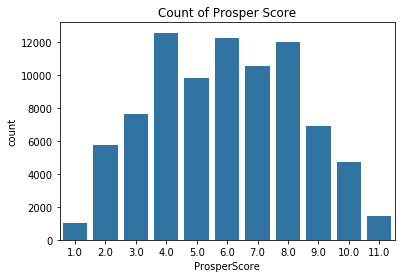

In [82]:
sb.countplot(data=loan, x="ProsperScore", color=color1);
plt.title('Count of Prosper Score');

We plot the prosperscore next to understand how is it being distributed in the data. The prosper score shows that many that there's a peak in 4,6,8. This means there should be certain variable that influences the score. But we're interested in how the score is formed right now, but rather how it impacts APR

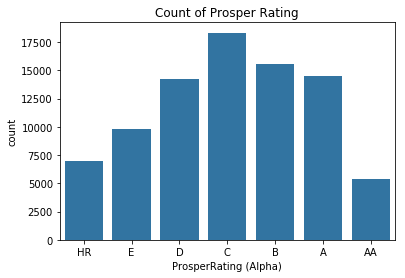

In [42]:
sb.countplot(data=loan, x="ProsperRating (Alpha)", color=color1);
plt.title('Count of Prosper Rating');

Propser score and prosper rating seems to have some differences in their distribution, so it's worth to explore both in our multi variable plotting in the next section to compare with APR

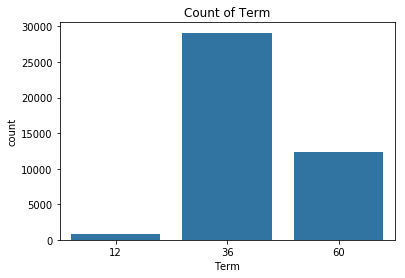

In [43]:
top_occupation = (loan['Occupation'].value_counts()> 1000).index[1:15]
top_loan = loan[loan["Occupation"].isin(top_occupation)]
sb.countplot(data=top_loan, x = "Term", color=color1);
plt.title('Count of Term');

Most of the loan is concentrated in a 36 month term. This would be interesting to see wether it influences the APR or not

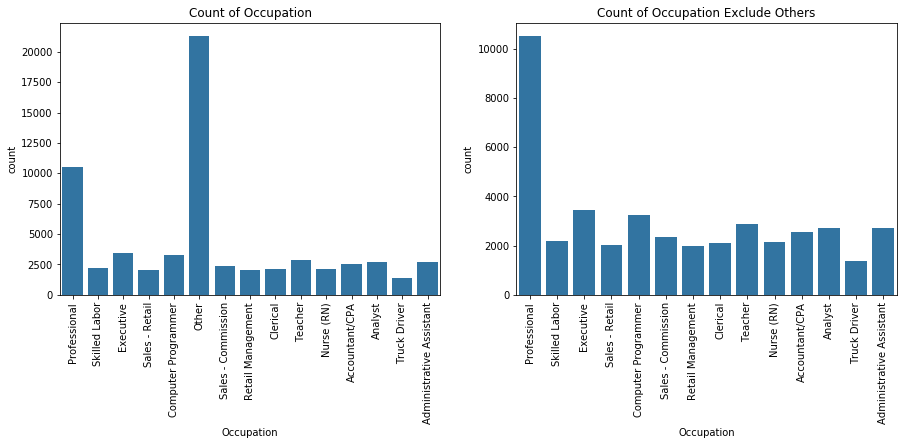

In [91]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
top_occupation = (loan['Occupation'].value_counts()> 1000).index[0:15]
top_loan = loan[loan["Occupation"].isin(top_occupation)]
sb.countplot(data=top_loan, x = "Occupation", color=color1);
plt.xticks(rotation=90)
plt.title('Count of Occupation');

plt.subplot(1, 2, 2)
top_occupation = (loan['Occupation'].value_counts()> 1000).index[1:15]
top_loan = loan[loan["Occupation"].isin(top_occupation)]
sb.countplot(data=top_loan, x = "Occupation", color=color1);
plt.xticks(rotation=90)
plt.title('Count of Occupation Exclude Others');

If we exclude others, many of the occupation seems to be professionals. Since we cannot properly classify others, it's not relatively possible to see how it impacts APR just with this figure.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The APR's, Loan Value's, LoanOriginalAmount and MonthlyLoanPayment's distribution seems to be multimodal. The prosper score seems to follow a bimodal distribution.  There's a significant amount of loan that have no credit ratings. So far, I was no necessity to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The StatedMonthlyIncome is highly right skewed. Without any operation on the data, there's a few outliers withe really huge monthly income which could be true but could likely be an error in the data entry as it don't reflect the amount of loan that person borrows (ussually less than 10k). I removed the top 0.1% of the loan using np.percentile function. The majority of the income now lies below 30k.

## Bivariate Exploration

In [92]:
# Setup variables
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'ListingCategory (numeric)', 'ProsperScore']
categoric_vars = ['LoanStatus', 'Occupation', 'Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'CreditGrade']

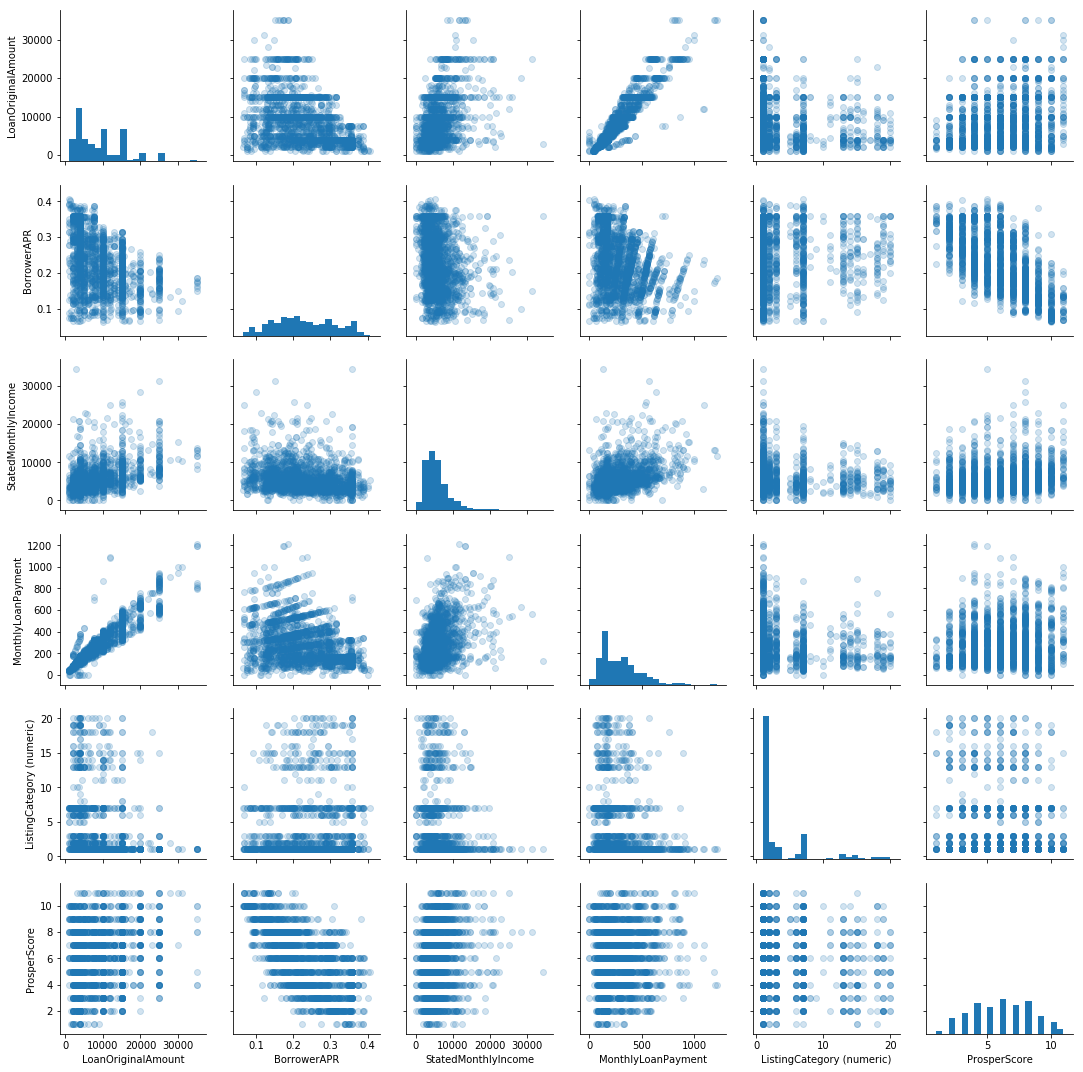

In [95]:
# Plot the Matrix : sample 2k loans so that plots are clearer and render faster
loan_samp = loan.sample(2000)
g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

We first plot a matrix to give an overall intuition to the dataset. There are some clear realtionship such as Monthly payment with Loan original amount but that would rather be obvious. We need to better understand relationship with the correlation in this case as most of figure don't have clear shape

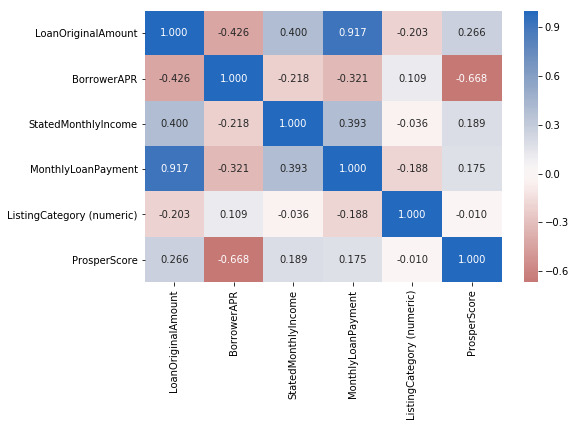

In [96]:
# Display The Correlation matrix using a heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

After plotting the correlation table, we can see there are not a lot of strong figure! What's interesting however is when we observe the correlation between the APR and Loan Original amount, we can see that it is negatively correlated at -0.323. We can hypothesize that the amount of the loan that is given will likely lower APR. Further , the borrower APR and prosperscore seems to be highly related at (-0.668). In the multivariate exploration, we will be able to perhaps check another feature and see if there are any variable that create more insight toward the matter of high vs low APR but in the meantime we will explore these two points of interest.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


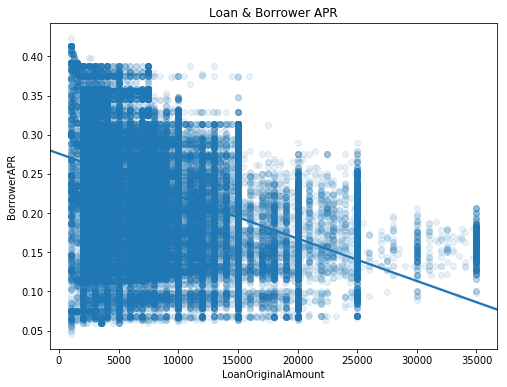

In [50]:
# plot loan and borrower APR
plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.1});
plt.title('Loan & Borrower APR');

First, I plotted the loan original amount with the APR. The trends is negative. From the position of the loan amount, it seems that there are less variability as the size of the loan increases. For example the range of 5k loan ranges from 0.5% to 5.2% while the 35k loan is from 1% to 2%. It seems like people who give loan in the prosper platform would see the risk of giving higher loan smaller compared to mini loans. 

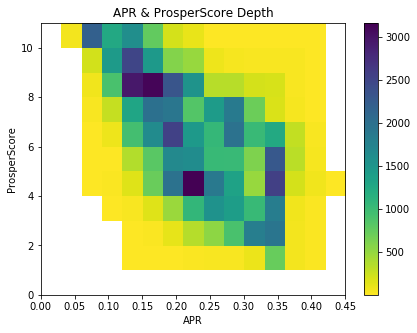

In [97]:
# Heat plot for ProsperScore and APR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5);

plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('APR')
plt.ylabel('ProsperScore');
plt.title('APR & ProsperScore Depth');

The stronger correlation so far is the APR with Prosperscore. Further visualization of the relationship between APR and ProsperScore with the heatplot map shows concertation such as how higher score (like 8) will likely have APR amount ranging from 0.10 and 0.15 as shown on the dark color


In [ ]:
g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

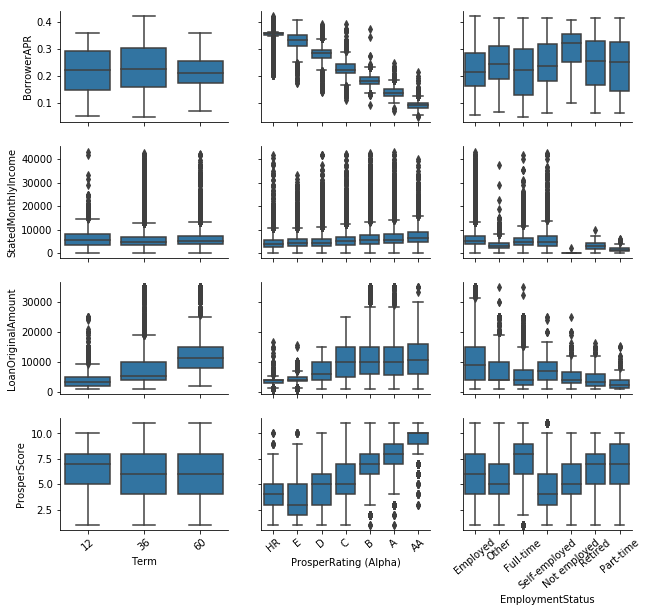

In [112]:
# plot matrix of numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = color1)
    plt.xticks(rotation=40);
    
plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', "ProsperScore"], 
                x_vars = ["Term", "ProsperRating (Alpha)", "EmploymentStatus"], size = 2, aspect = 1.5);
g.map(boxgrid);


The plot matrix further verify that prosper related feature (as shown through prosper rating) have a significant impact on the APR. As we can observer, AA prosper rating and A have a lower APR score, compared to those with D or E ratings. Prosper rating seems to be determined by the amount of monthly income.

Employent status also seems to impact the APR range as those who are retired, unemployed or doing part time have generally higher APR range and have higher max APR compared to the rest of the group.

User who borrow with longer term (60) have a smaller boxplot in their APR range (between 0.25 - 01.5) compared to those who borrow in shorter term. Interesting a 36 month terms seems to have higher APR compared to a 12 month term.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>There are two interesting relationship that I observed in regards toward the APR. The first is how the size of the loan have some relationship with lower APR although it's relatively weak with (-0.3) correlation. The ProsperScore has stronger relationship (-0.6) and seems to be a key variable in determining the APR of the loan.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income
> The ProsperScore have positively correlated with LoanOriginalAmmount, StatedMonthlyIncome and MonthlyLoanPayment
> Employment status seems to impact prosper scores



## Multivariate Exploration

<Figure size 1080x360 with 0 Axes>

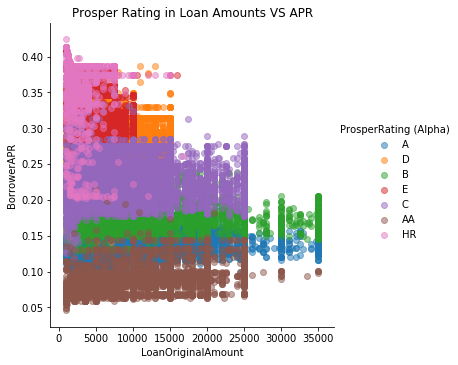

In [53]:
# plot prosper rating , loan amount, APR
plt.figure(figsize = [15, 5]);
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.5)
g.add_legend();
plt.title('Prosper Rating in Loan Amounts VS APR');

We can observe there is clear categroy of how Propser Rating impact the amount of APR in relation to the amount of loan. User who have high ProsperRating are likely to receive lower APR acrross the different range of loan amount. 


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


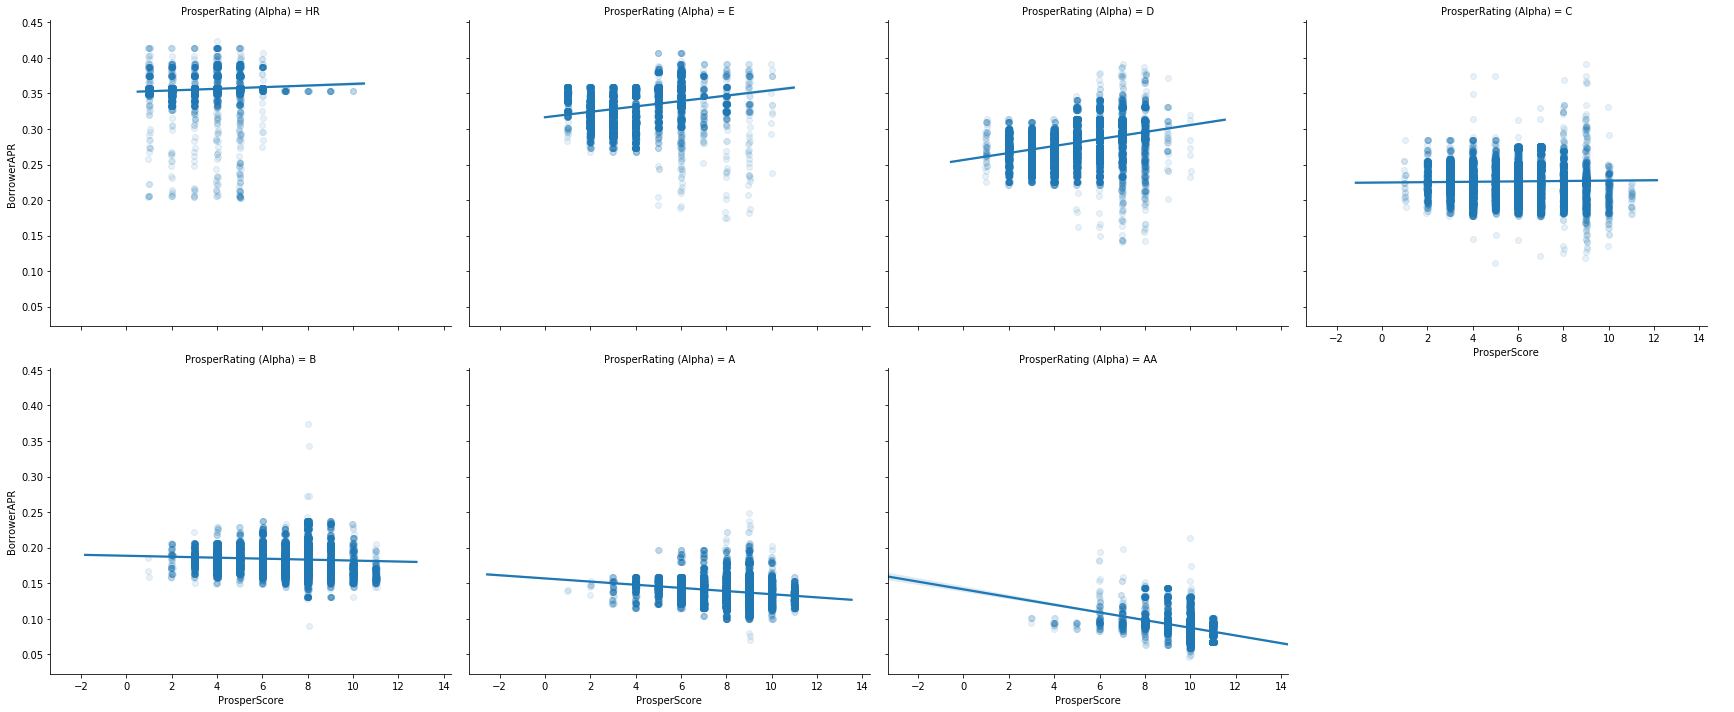

In [54]:
# plot facets
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Using FacetGrid, we can visualize the relationship between ProsperScore and APR with different category of ProsperRating. As we've analzyed in the bivariate exploration, we can confirm our initial hypothesis that lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. It seems like the ProsperRating Category do have some diferences in the score that they put but the overall distribution falls aproximately as we expect (higher rating = higher score)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


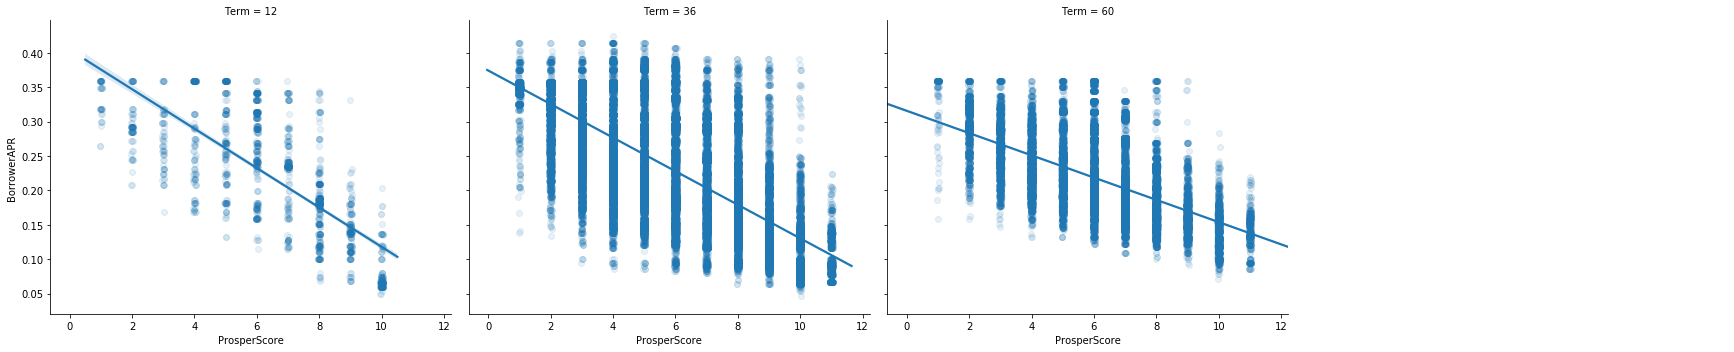

In [55]:
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

We use faceting to obser how prosperscore and APR is related. It seems like  there's wide range of distribution in the 36 terms. This means, there's a wider pool of people who apply for 36 terms loan while those who apply for 60 terms are more concentrated. There seems to be little 12 terms loan application as the hue of the color is not so strong..

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


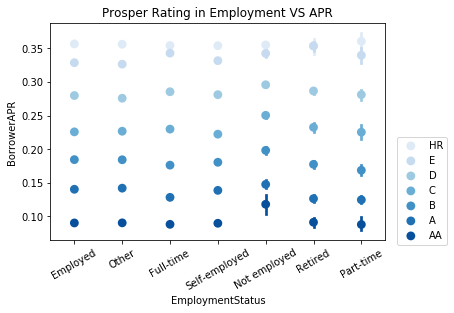

In [56]:
# plot employment, proper rating, APR
sb.pointplot(data = loan, x = 'EmploymentStatus' , y = 'BorrowerAPR', hue ='ProsperRating (Alpha)',
           palette = 'Blues', linestyles = '').legend(bbox_to_anchor=(1.2, 0.5))

plt.xticks(rotation=30);
plt.title('Prosper Rating in Employment VS APR');

AA part timers seems to have the lowest borower APR while having HR part timers have the highest APR. This is out of expectaction as I expected full time employees to have lower APR. Regardless, the non employed have higer APR generally and this is not surprising.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During our analysis before, we hyptohesized that there are some relationship between APR with prosper related feature alongside APR with the size of the loan. Whe we combined these variables together such as in the first figure, we can explain that APR are influenced more from the prosper related feature rather than the size of the loan. Smaller loans ussually don't have a high prosper related feature which is why they have higher APR.